<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Vacunaci%C3%B3n_MINSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize system

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
 
## other dependencies
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load database (MINSA Vacunaciones)

In [ ]:
import requests 
 
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
 
url_minsa = 'MINSA_Vacunaciones.csv'
download_url("https://cloud.minsa.gob.pe/s/ZgXoXqK2KLjRLxD/download", url_minsa)
# ISO-8859-1
datos_vacuna_MINSA = pd.read_csv(url_minsa, encoding = "UTF-8", sep=",")
 
#cut_date = ''
datos_vacuna_MINSA

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210322,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO
1,20210322,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210318,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO
2,20210322,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210219,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
3,20210322,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210312,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
4,20210322,54048fe3b06c35f14350d7e81340bdbd,PERSONAL DE SALUD,44.0,MASCULINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
...,...,...,...,...,...,...,...,...,...,...,...,...
706745,20210322,4c598ad4495a41b8b7d84190b8774610,PERSONAL DE SALUD,NaN,MASCULINO,20210320,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,JESUS MARIA
706746,20210322,d8ec71e56d48bff6244366d238f0199c,ADULTO MAYOR,73.0,MASCULINO,20210319,1,PFIZER,LORETO,LORETO,MAYNAS,SAN JUAN BAUTISTA
706747,20210322,c53f0df2a4d440738f5750af7424a942,PERSONAL DE SALUD,NaN,MASCULINO,20210322,1,PFIZER,LIMA SUR,LIMA,LIMA,VILLA EL SALVADOR
706748,20210322,ac3d99826ec3ff2f263cfe75a5d63909,PERSONAL DE SALUD,NaN,MASCULINO,20210322,1,PFIZER,LIMA SUR,LIMA,LIMA,VILLA EL SALVADOR


# Data Analysis
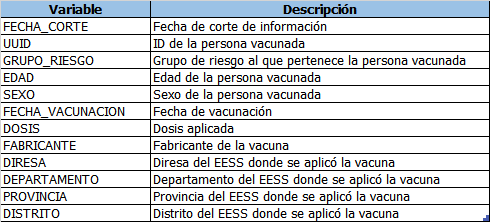

In [ ]:
datos_vacuna_MINSA.sort_values('FECHA_VACUNACION', inplace=True)
datos_vacuna_MINSA.dropna(inplace=True)
datos_vacuna_MINSA['FECHA_VACUNACION'] = datos_vacuna_MINSA['FECHA_VACUNACION'].astype(str)
datos_vacuna_MINSA.reset_index(drop=True, inplace=True)
datos_vacuna_MINSA['FECHA_VACUNACION'] = pd.to_datetime(datos_vacuna_MINSA['FECHA_VACUNACION'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))
#datos_vacuna_MINSA['FECHA_VACUNACION'] = pd.to_datetime(datos_vacuna_MINSA['FECHA_VACUNACION'])
#datos_vacuna_MINSA['FECHA_CORTE'] = pd.to_datetime(datos_vacuna_MINSA['FECHA_CORTE'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))
datos_vacuna_MINSA['uno'] = 1
datos_vacuna_MINSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660516 entries, 0 to 660515
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FECHA_CORTE       660516 non-null  int64         
 1   UUID              660516 non-null  object        
 2   GRUPO_RIESGO      660516 non-null  object        
 3   EDAD              660516 non-null  float64       
 4   SEXO              660516 non-null  object        
 5   FECHA_VACUNACION  660516 non-null  datetime64[ns]
 6   DOSIS             660516 non-null  int64         
 7   FABRICANTE        660516 non-null  object        
 8   DIRESA            660516 non-null  object        
 9   DEPARTAMENTO      660516 non-null  object        
 10  PROVINCIA         660516 non-null  object        
 11  DISTRITO          660516 non-null  object        
 12  uno               660516 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memor

# Análisis Peru

In [ ]:
df_peru = datos_vacuna_MINSA.sort_values('FECHA_VACUNACION')
df_peru.reset_index(inplace=True, drop=True)
df_peru.tail()


df_peru.GRUPO_RIESGO.unique()

array(['PERSONAL DE SALUD', 'PERSONAL DE SEGURIDAD',
       'TRABAJADOR Ó PERSONAL DE LIMPIEZA',
       'ESTUDIANTES DE CIENCIAS DE LA SALUD', 'POLICIA NACIONAL DEL PERU',
       'PERSONAL MILITAR Ó FF AA', 'BRIGADISTAS', 'ADULTO MAYOR'],
      dtype=object)

In [ ]:
#df_peru_sin_duplicados = df_peru.drop(['UUID', 'FECHA_CORTE'], 1)
#df_peru_sin_duplicados = df_peru_sin_duplicados.drop_duplicates()
 
df_peru_reg_sin_dup_zc = df_peru.groupby(['FECHA_VACUNACION']).sum()
df_peru_reg_sin_dup_zc.to_csv('VacunacionDía_Peru.csv')

df_peru_Dosis1 = df_peru.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_peru_Dosis2 = df_peru.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
dosis_12 = [df_peru_Dosis1['uno'].sum(),df_peru_Dosis2['uno'].sum()] 
dosis_12


[441391, 219125]

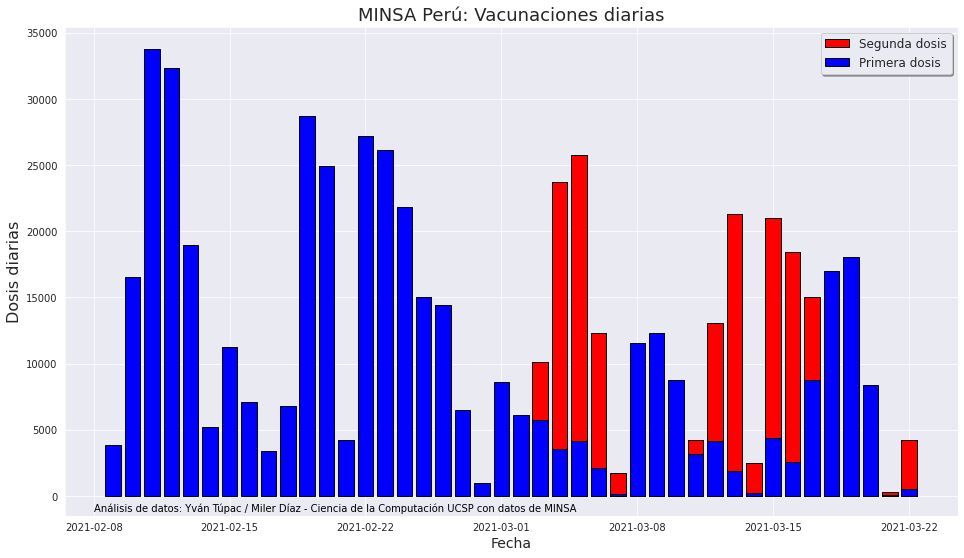

In [ ]:
#Code Yvan

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
ax1.xaxis_date()
ax1.bar(df_peru_Dosis2.index,df_peru_Dosis2.uno, label='Segunda dosis', color='r',edgecolor='k')
ax1.bar(df_peru_Dosis1.index,df_peru_Dosis1.uno, label='Primera dosis',color='b',edgecolor='k')
ax1.set_ylim(-1500)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-8'), -1200, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.title('MINSA Perú: Vacunaciones diarias',fontsize=18)
plt.savefig('MINSA_PeruVacunasDosisDia.pdf')
plt.show()

In [ ]:
""" Code Miler """
df_peru_diario = df_peru.pivot_table(index=['FECHA_VACUNACION'], columns=['DOSIS'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario = df_peru_diario.reset_index().rename_axis(None, axis=1)
df_peru_diario.columns = ['FECHA_VACUNACION', 'DOSIS_1', 'DOSIS_2']
df_peru_diario

,FECHA_VACUNACION,DOSIS_1,DOSIS_2
0,2021-02-09,3836.0,0.0
1,2021-02-10,16564.0,0.0
2,2021-02-11,33779.0,0.0
3,2021-02-12,32315.0,0.0
4,2021-02-13,18940.0,0.0
5,2021-02-14,5181.0,0.0
6,2021-02-15,11219.0,0.0
7,2021-02-16,7133.0,0.0
8,2021-02-17,3398.0,0.0
9,2021-02-18,6788.0,0.0


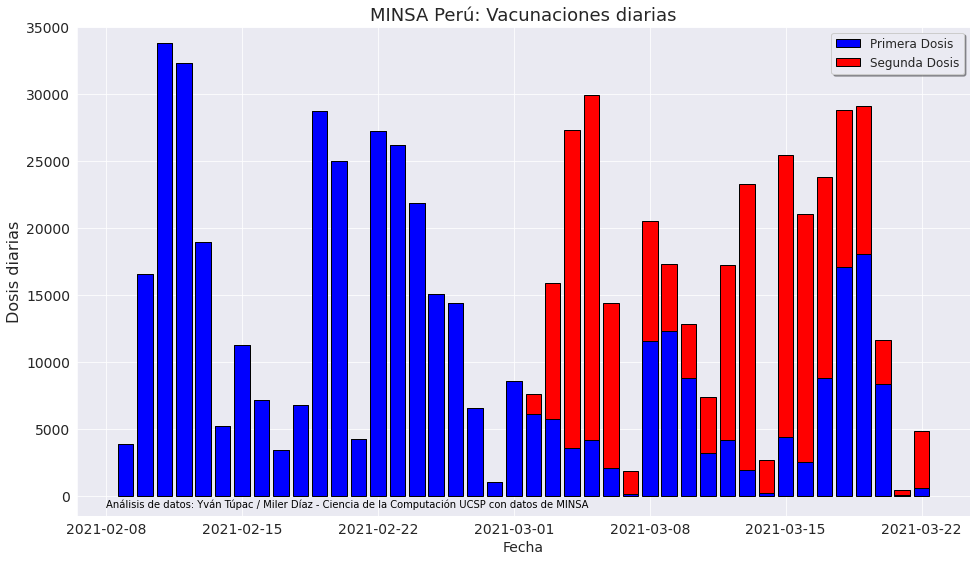

<Figure size 432x288 with 0 Axes>

In [ ]:
""" Code Miler """
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
ax1.bar(df_peru_diario['FECHA_VACUNACION'], df_peru_diario['DOSIS_1'], color='b', edgecolor='k', label='Primera Dosis')
ax1.bar(df_peru_diario['FECHA_VACUNACION'], df_peru_diario['DOSIS_2'], bottom=df_peru_diario['DOSIS_1'], color = 'r', edgecolor='k', label='Segunda Dosis')

plt.title('MINSA Perú: Vacunaciones diarias',fontsize=18)

ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_ylim(-1500, 35000)
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)
ax1.tick_params(labelsize=14)

style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-8'), -900, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)

plt.show()
plt.clf()


In [ ]:
""" Code Miler """
df_peru_diario_dosis_1 = df_peru[df_peru['DOSIS'] == 1]
df_peru_diario_dosis_2 = df_peru[df_peru['DOSIS'] == 2]
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2.pivot_table(index=['FECHA_VACUNACION'], columns=['GRUPO_RIESGO'], values='UUID', aggfunc=len).fillna(0)
df_peru_diario_dosis_1_por_grupo_riesgo = df_peru_diario_dosis_1_por_grupo_riesgo.reset_index().rename_axis(None, axis=1)
df_peru_diario_dosis_2_por_grupo_riesgo = df_peru_diario_dosis_2_por_grupo_riesgo.reset_index().rename_axis(None, axis=1)
df_peru_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'] = df_peru_diario_dosis_1_por_grupo_riesgo['FECHA_VACUNACION'].dt.date
df_peru_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'] = df_peru_diario_dosis_2_por_grupo_riesgo['FECHA_VACUNACION'].dt.date
display(df_peru_diario_dosis_1_por_grupo_riesgo.tail())
display(df_peru_diario_dosis_2_por_grupo_riesgo.tail())

,FECHA_VACUNACION,ADULTO MAYOR,BRIGADISTAS,ESTUDIANTES DE CIENCIAS DE LA SALUD,PERSONAL DE SALUD,PERSONAL DE SEGURIDAD,PERSONAL MILITAR Ó FF AA,POLICIA NACIONAL DEL PERU,TRABAJADOR Ó PERSONAL DE LIMPIEZA
37,2021-03-18,7716.0,18.0,0.0,857.0,16.0,28.0,8370.0,23.0
38,2021-03-19,9157.0,19.0,3.0,1105.0,5.0,28.0,7578.0,137.0
39,2021-03-20,1944.0,2.0,2.0,321.0,0.0,102.0,5995.0,1.0
40,2021-03-21,46.0,0.0,0.0,25.0,0.0,8.0,0.0,1.0
41,2021-03-22,45.0,0.0,1.0,472.0,0.0,2.0,16.0,6.0


,FECHA_VACUNACION,ADULTO MAYOR,BRIGADISTAS,ESTUDIANTES DE CIENCIAS DE LA SALUD,PERSONAL DE SALUD,PERSONAL DE SEGURIDAD,PERSONAL MILITAR Ó FF AA,POLICIA NACIONAL DEL PERU,TRABAJADOR Ó PERSONAL DE LIMPIEZA
16,2021-03-18,0.0,0.0,6.0,11383.0,86.0,94.0,36.0,127.0
17,2021-03-19,0.0,0.0,124.0,10593.0,64.0,98.0,101.0,78.0
18,2021-03-20,0.0,0.0,10.0,3067.0,77.0,3.0,8.0,53.0
19,2021-03-21,0.0,0.0,2.0,301.0,4.0,0.0,0.0,1.0
20,2021-03-22,0.0,0.0,3.0,4157.0,15.0,18.0,37.0,26.0


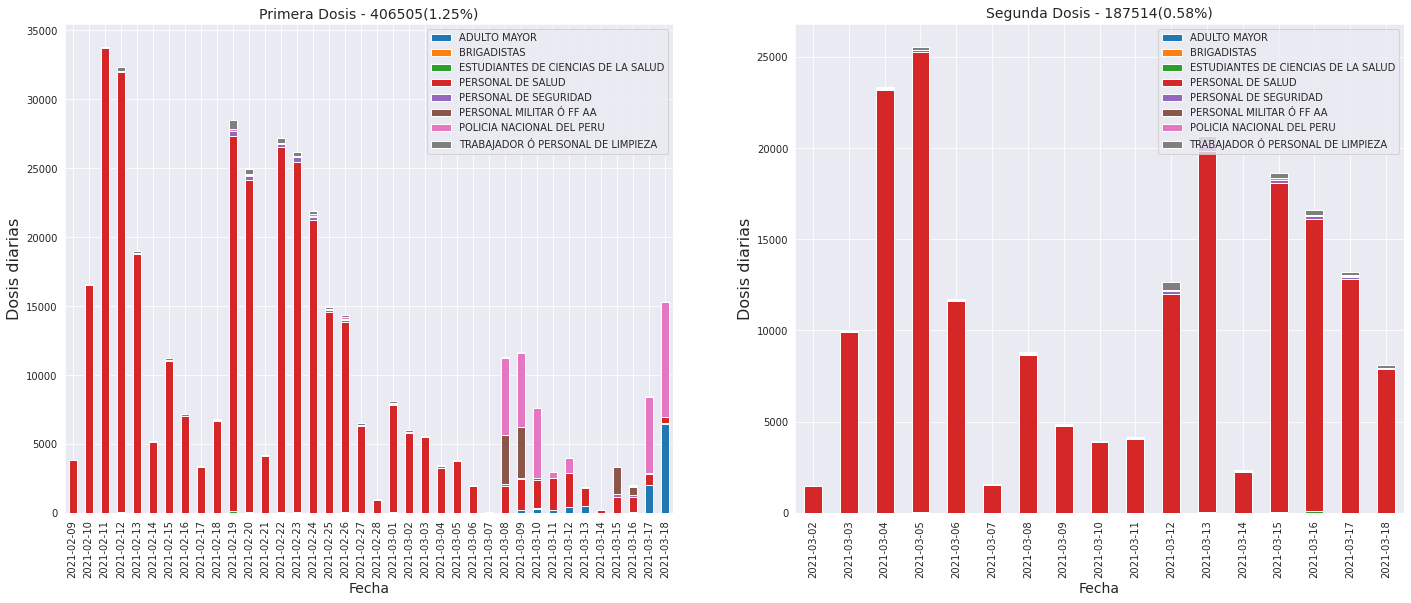

<Figure size 432x288 with 0 Axes>

In [ ]:
""" Code Miler """
poblacion_peru = 32510000

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 9))
#axe = plt.subplot(111)

df_peru_diario_dosis_1_por_grupo_riesgo.set_index('FECHA_VACUNACION').plot(kind='bar', stacked = True, ax=ax1)
df_peru_diario_dosis_2_por_grupo_riesgo.set_index('FECHA_VACUNACION').plot(kind='bar', stacked = True, ax=ax2)

plt.title('MINSA Perú: Vacunaciones diarias por Grupo de Riesgo',fontsize=18)

ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
ax1.set_title('Primera Dosis - ' + str(int(df_peru_diario_dosis_1_por_grupo_riesgo.sum().sum())) + '(' + str(round(df_peru_diario_dosis_1_por_grupo_riesgo.sum().sum() / poblacion_peru * 100, 2)) + '%)', fontsize=14)

ax2.set_ylabel('Dosis diarias', fontsize=16)
ax2.set_xlabel('Fecha', fontsize=14)
ax2.set_title('Segunda Dosis - ' + str(int(df_peru_diario_dosis_2_por_grupo_riesgo.sum().sum())) + '(' + str(round(df_peru_diario_dosis_2_por_grupo_riesgo.sum().sum() / poblacion_peru * 100, 2)) + '%)', fontsize=14)

#ax1.text(pd.to_datetime('2021-02-10'), 0, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA")
#ax2.text(pd.to_datetime('2021-02-10'), 0, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA")
plt.show()
plt.clf()

In [ ]:
df_peru.FABRICANTE.unique()

array(['SINOPHARM', 'PFIZER'], dtype=object)

In [ ]:
df_peru_SINOPHARM = df_peru.query('FABRICANTE == "SINOPHARM"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_peru_PFIZER    = df_peru.query('FABRICANTE == "PFIZER"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
Fabricantes = [df_peru_SINOPHARM['uno'].sum(),df_peru_PFIZER['uno'].sum()] 
Fabricantes

[579182, 81334]

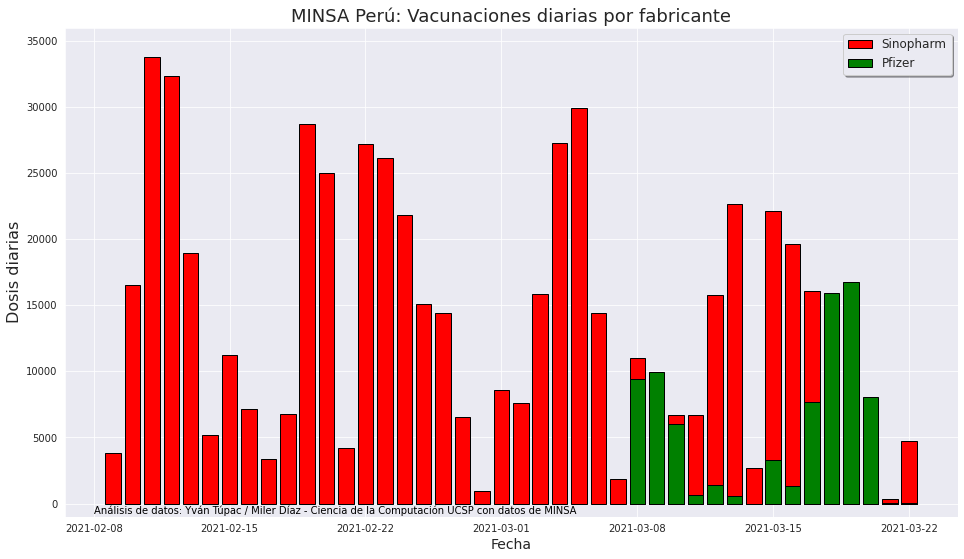

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
ax1.xaxis_date()
ax1.bar(df_peru_SINOPHARM.index,df_peru_SINOPHARM.uno, label='Sinopharm', color='r',edgecolor='k')
ax1.bar(df_peru_PFIZER.index,df_peru_PFIZER.uno, label='Pfizer',color='g',edgecolor='k')
ax1.set_ylim(-1000,36000)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-8'), -800, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.title('MINSA Perú: Vacunaciones diarias por fabricante',fontsize=18)
plt.savefig('MINSA_PeruVacunasFabricanteDia.pdf')
plt.show()

# Análisis Arequipa

In [ ]:
df_arequipa_region = datos_vacuna_MINSA[datos_vacuna_MINSA['DEPARTAMENTO'] == 'AREQUIPA'].sort_values('FECHA_VACUNACION')
df_arequipa_region.reset_index(inplace=True, drop=True)
df_arequipa_region.tail()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,uno
34406,20210322,6ec87159f48ad5a7de42ce26a84f0212,PERSONAL DE SALUD,52.0,MASCULINO,2021-03-22,2,SINOPHARM,AREQUIPA,AREQUIPA,AREQUIPA,CAYMA,1
34407,20210322,51b80327b8d5bfcfb71e35f676279ce6,PERSONAL DE SALUD,61.0,FEMENINO,2021-03-22,2,SINOPHARM,AREQUIPA,AREQUIPA,AREQUIPA,TIABAYA,1
34408,20210322,b322083efd8114185fc581812495355c,PERSONAL DE SALUD,62.0,FEMENINO,2021-03-22,2,SINOPHARM,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,1
34409,20210322,0117174bf047820a5e55bc3f58895569,PERSONAL DE SALUD,42.0,FEMENINO,2021-03-22,2,SINOPHARM,AREQUIPA,AREQUIPA,AREQUIPA,MIRAFLORES,1
34410,20210322,6c944bc7fcb60f2324537ba6fdb108f1,PERSONAL DE SALUD,35.0,MASCULINO,2021-03-22,2,SINOPHARM,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,1


In [ ]:
#df_arequipa_region_sin_duplicados = df_arequipa_region.drop(['UUID', 'FECHA_CORTE'], 1)
#df_arequipa_region_sin_duplicados = df_arequipa_region_sin_duplicados.drop_duplicates()
 
df_arequipa_region.FABRICANTE.unique()

array(['SINOPHARM', 'PFIZER'], dtype=object)

In [ ]:
df_arequipa_region.DOSIS.unique()

array([1, 2])

In [ ]:
df_arequipa_region.GRUPO_RIESGO.unique()

array(['PERSONAL DE SALUD', 'TRABAJADOR Ó PERSONAL DE LIMPIEZA',
       'PERSONAL DE SEGURIDAD', 'POLICIA NACIONAL DEL PERU',
       'PERSONAL MILITAR Ó FF AA', 'ADULTO MAYOR', 'BRIGADISTAS'],
      dtype=object)

# Avance de vacunación por grupos de riesgo

In [ ]:
df_are_reg_sin_dup_zc = df_arequipa_region.groupby(['FECHA_VACUNACION']).sum()
df_are_reg_sin_dup_zc.to_csv('VacunacionDía_Arequipa.csv')
df_are_reg_sin_dup_zc.tail()

,FECHA_CORTE,EDAD,DOSIS,uno
FECHA_VACUNACION,,,,
2021-03-18,71706222456,179385.0,3892,3548
2021-03-19,51778844964,121201.0,2887,2562
2021-03-20,26071315380,86765.0,1523,1290
2021-03-21,1354091574,4629.0,86,67
2021-03-22,8084128800,16476.0,775,400


Text(0.5, 1.0, 'MINSA Región Arequipa: Vacunaciones diarias')

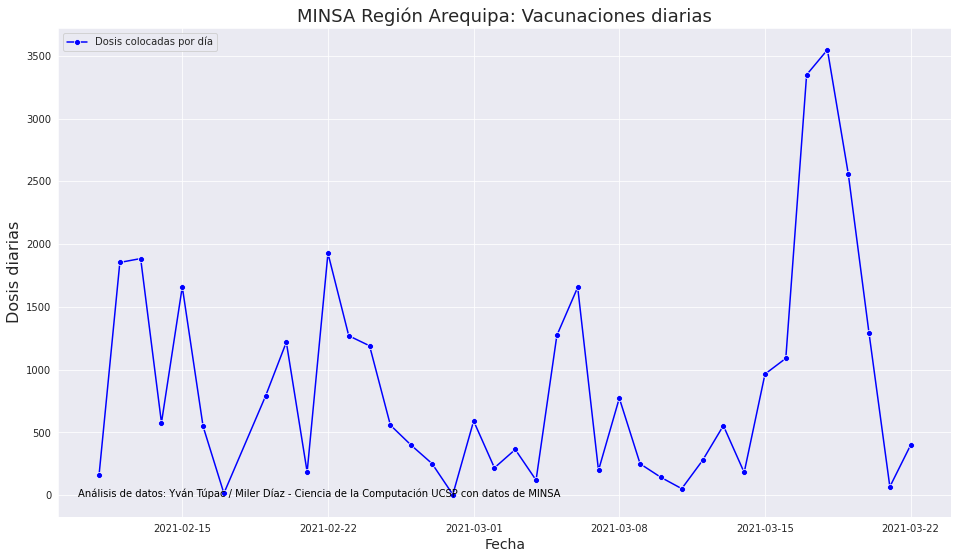

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
# Labels
sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="uno",  label='Dosis colocadas por día', ax=ax1,color='b',linewidth=1.50,marker='o')
#sns.lineplot(data=df_are_reg_sin_dup_zc, x=df_are_reg_sin_dup_zc.index, y="CAMAS_ZC_OCUPADOS", label='Camas UCI Ocupadas',  ax=ax1,color='r',linewidth=2.5)
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-10'), -16, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
#plt.xticks(ax1, labels, rotation='vertical')
plt.title('MINSA Región Arequipa: Vacunaciones diarias',fontsize=18)

# Arequipa: Vacunación por Dosis

In [ ]:
df_AQP_Dosis1 = df_arequipa_region.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_AQP_Dosis2 = df_arequipa_region.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
df_AQP_Dosis1['uno'].sum()
 
#df_AQP_Dosis = df_arequipa_region_sin_duplicados.sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis["D1"] = df_arequipa_region_sin_duplicados.query('DOSIS == 1').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis["D2"] = df_arequipa_region_sin_duplicados.query('DOSIS == 2').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
#df_AQP_Dosis.tail(8)

24502

In [ ]:
df_AQP_Dosis2['uno'].sum()

9909

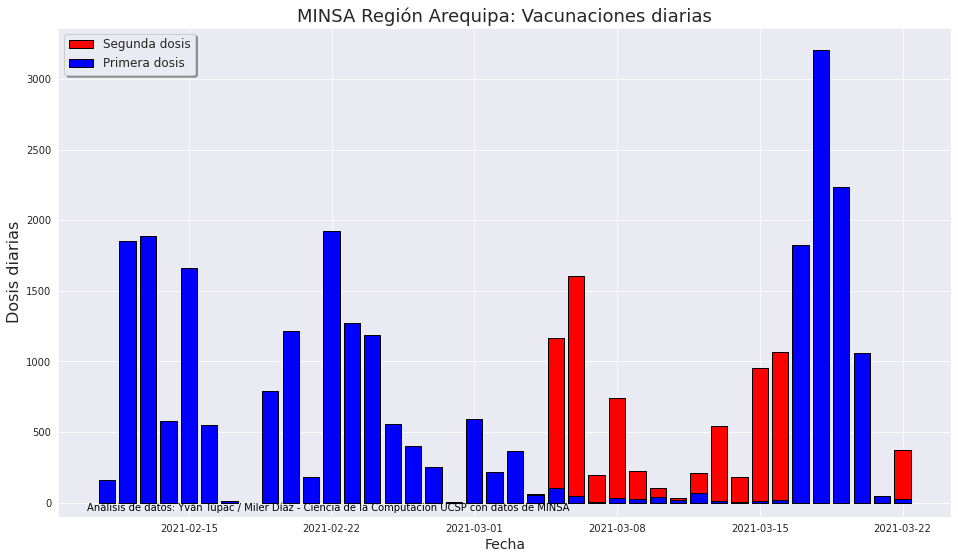

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
 
# Labels
#sns.barplot(data=df_AQP_Dosis1, x=df_AQP_Dosis1.index, y="DOSIS", label='Primera dosis ', ax=ax1,color='b')
#sns.barplot(data=df_AQP_Dosis2, x=df_AQP_Dosis2.index, y="DOSIS", label='Segunda Dosis',  ax=ax1,color='r')
 
ax1.xaxis_date()
ax1.bar(df_AQP_Dosis2.index,df_AQP_Dosis2.uno, label='Segunda dosis', color='r',edgecolor='k')
ax1.bar(df_AQP_Dosis1.index,df_AQP_Dosis1.uno, label='Primera dosis',color='b',edgecolor='k')
ax1.set_ylim(-100)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-10'), -60, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
 
plt.title('MINSA Región Arequipa: Vacunaciones diarias',fontsize=18)
plt.savefig('MINSA_ArequipaVacunasDosisDia.pdf')
plt.show()

# Arequipa: Vacunación por Grupo de Riesgo

In [ ]:
df_arequipa_region.GRUPO_RIESGO.unique()

array(['PERSONAL DE SALUD', 'TRABAJADOR Ó PERSONAL DE LIMPIEZA',
       'PERSONAL DE SEGURIDAD', 'POLICIA NACIONAL DEL PERU',
       'PERSONAL MILITAR Ó FF AA', 'ADULTO MAYOR', 'BRIGADISTAS'],
      dtype=object)

In [ ]:
 grupo_risk = df_arequipa_region.GRUPO_RIESGO.unique()
 df_AQP_grupo_risk1 = df_arequipa_region.query('GRUPO_RIESGO == "PERSONAL DE SALUD"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 df_AQP_grupo_risk2 = df_arequipa_region.query('GRUPO_RIESGO == "TRABAJADOR Ó PERSONAL DE LIMPIEZA"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 df_AQP_grupo_risk3 = df_arequipa_region.query('GRUPO_RIESGO == "PERSONAL DE SEGURIDAD"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()
 df_AQP_grupo_risk4 = df_arequipa_region.query('GRUPO_RIESGO == "POLICIA NACIONAL DEL PERU"').sort_values('FECHA_VACUNACION').groupby(['FECHA_VACUNACION']).sum()

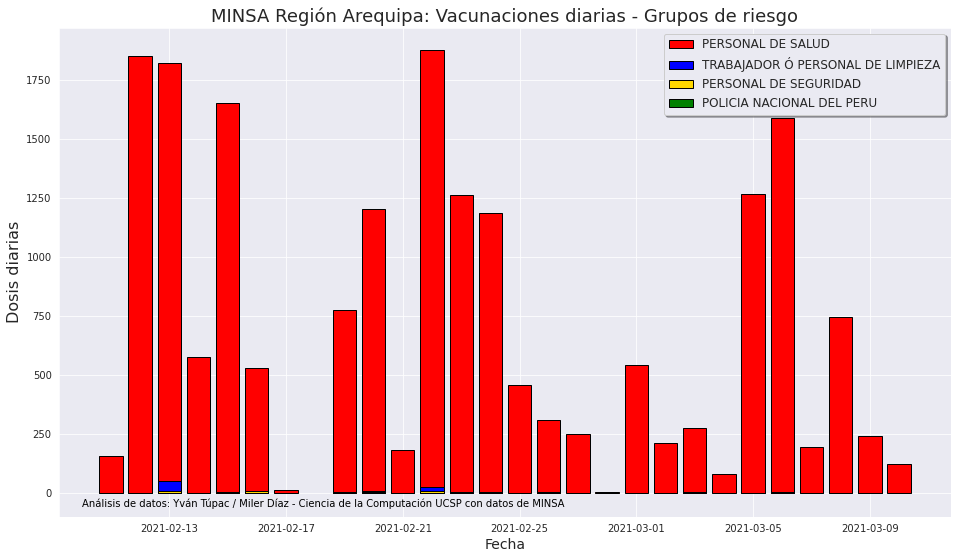

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
ax1.xaxis_date()
ax1.bar(df_AQP_grupo_risk1.index,df_AQP_grupo_risk1.uno, label=grupo_risk[0], color='red',edgecolor='k')
ax1.bar(df_AQP_grupo_risk2.index,df_AQP_grupo_risk2.uno, label=grupo_risk[1], color='blue',edgecolor='k')
ax1.bar(df_AQP_grupo_risk3.index,df_AQP_grupo_risk3.uno, label=grupo_risk[2], color='gold',edgecolor='k')
ax1.bar(df_AQP_grupo_risk4.index,df_AQP_grupo_risk4.uno, label=grupo_risk[3], color='green',edgecolor='k')
ax1.set_ylim(-100)
 
ax1.legend(fancybox=True, shadow=True, ncol=1,fontsize=12)#
ax1.set_ylabel('Dosis diarias', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=14)
style = dict(size=10, color='k')
ax1.text(pd.to_datetime('2021-02-10'), -60, "Análisis de datos: Yván Túpac / Miler Díaz - Ciencia de la Computación UCSP con datos de MINSA", **style)
plt.title('MINSA Región Arequipa: Vacunaciones diarias - Grupos de riesgo',fontsize=18)
plt.savefig('MINSA_AQPVacunasGruposRiesgo.pdf')
plt.show()